In [15]:
import pandas as pd
import numpy as np



In [16]:
data=pd.read_csv(r"C:\Users\HP\Downloads\archive\PMPL South Asia.csv")
data.head(5)

,Match Played,Teams,Group,Map,Groups Playing,Week,Day,Match No,Team Match No,Chicken Dinner,Placement,Kills,Total
0,1,Celtz,A,Erangel,A B C D,1,1,1,1,0,1,2,3
1,1,Crwl,B,Erangel,A B C D,1,1,1,1,0,8,3,11
2,1,Deadeyes,D,Erangel,A B C D,1,1,1,1,0,1,0,1
3,0,EX,E,Erangel,A B C D,1,1,1,0,0,0,0,0
4,1,Fnatic,D,Erangel,A B C D,1,1,1,1,0,2,5,7


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Match Played    1200 non-null   int64 
 1   Teams           1200 non-null   object
 2   Group           1200 non-null   object
 3   Map             1200 non-null   object
 4   Groups Playing  1200 non-null   object
 5   Week            1200 non-null   int64 
 6   Day             1200 non-null   int64 
 7   Match No        1200 non-null   int64 
 8   Team Match No   1200 non-null   int64 
 9   Chicken Dinner  1200 non-null   int64 
 10  Placement       1200 non-null   int64 
 11  Kills           1200 non-null   int64 
 12  Total           1200 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 122.0+ KB


In [18]:
data.isna().sum()

Match Played      0
Teams             0
Group             0
Map               0
Groups Playing    0
Week              0
Day               0
Match No          0
Team Match No     0
Chicken Dinner    0
Placement         0
Kills             0
Total             0
dtype: int64

In [19]:
#1 What is the total number of teams in the tournament?

data['Teams'].nunique()

20

In [20]:
#2 How many matches were played in total?
data['Match No'].nunique()

60

In [21]:
#3 List the top 5 teams by total kills.

data.groupby('Teams')['Kills'].sum().sort_values(ascending=False).head(5)

Teams
 TSM Entity    276
 SGE           266
 OR            241
 GodLike       223
 MegaStars     187
Name: Kills, dtype: int64

In [22]:
#4 What is the average number of kills per match?
data.groupby('Match No')['Kills'].mean()

Match No
1     2.45
2     2.80
3     2.95
4     2.70
5     2.95
6     2.65
7     2.55
8     2.80
9     2.75
10    2.75
11    2.75
12    2.60
13    2.85
14    2.75
15    2.80
16    2.80
17    2.95
18    2.70
19    2.90
20    2.80
21    2.80
22    2.65
23    2.85
24    2.80
25    2.65
26    2.65
27    3.05
28    2.85
29    2.80
30    2.90
31    2.95
32    2.75
33    2.90
34    3.00
35    2.55
36    2.85
37    3.00
38    2.80
39    2.85
40    3.00
41    2.85
42    2.70
43    2.70
44    2.80
45    2.75
46    2.70
47    2.75
48    3.00
49    2.60
50    2.75
51    2.90
52    2.70
53    2.80
54    2.85
55    2.80
56    2.90
57    2.65
58    2.55
59    2.75
60    2.85
Name: Kills, dtype: float64

In [23]:
average_kills_per_match = data['Kills'].sum() / data['Match No'].nunique()
print("Average number of kills per match:", average_kills_per_match)


Average number of kills per match: 55.75


In [24]:
#5 Which team had the most kills in a single match?
data.groupby('Teams')['Kills'].max().sort_values(ascending=False).head(1)

Teams
 TSM Entity    19
Name: Kills, dtype: int64

In [25]:
#6 What is the average rank achieved by each team?

average_rank_per_team = data.groupby('Teams')['Placement'].mean().sort_values()
print("Average rank achieved by each team:")
print(average_rank_per_team)


Average rank achieved by each team:
Teams
 Deadeyes      2.233333
 Hype          2.983333
 Tamilas       3.200000
 Instinct      3.283333
 JyanMaara     3.400000
 Xtreme        3.450000
 Celtz         3.483333
 Umumba Rxn    3.800000
 EX            3.833333
 IND           4.000000
 SouL          4.166667
 Fnatic        4.366667
 Crwl          4.383333
 Marcos        4.433333
 PowerH        4.500000
 MegaStars     5.100000
 SGE           5.333333
 TSM Entity    5.916667
 GodLike       6.200000
 OR            6.933333
Name: Placement, dtype: float64


In [26]:
#7 Identify the team with the least number of kills.
data.groupby('Teams')['Kills'].sum().sort_values().head(1)

Teams
 Deadeyes    95
Name: Kills, dtype: int64

In [27]:
#8 How many teams scored more than 100 points in the tournament?

total_points = data.groupby('Teams')['Total'].sum().reset_index()

above_100 = total_points[total_points['Total'] > 100]

result = above_100.shape[0]

print("Number of teams that scored more than 100 points: {}".format(result))


Number of teams that scored more than 100 points: 20


In [46]:
#9 What is the maximum damage dealt by a single player in a match?

damage = data.groupby(['Teams', 'Match No'])['Total'].sum().reset_index()


max_damage = damage['Total'].max()


max_damage_player = damage.loc[damage['Total'].idxmax()]


print("Maximum damage dealt by a single player in a match: {}".format(max_damage))

print("Player: {}, Match No: {}".format(max_damage_player['Teams'],max_damage_player['Match No']))



Maximum damage dealt by a single player in a match: 39
Player:  TSM Entity, Match No: 1


In [29]:
#10 Calculate the total points earned by the top 3 teams.
data.groupby('Teams')['Total'].sum().sort_values(ascending=False).head(3)

Teams
 OR            657
 TSM Entity    631
 GodLike       595
Name: Total, dtype: int64

In [30]:
#11 Which team had the highest average damage across all matches?

data.groupby('Teams')['Total'].mean().sort_values(ascending=False).head(1)



Teams
 OR    10.95
Name: Total, dtype: float64

In [31]:
#12 Calculate the standard deviation of kills for each team.

data.groupby('Teams')['Kills'].std()


Teams
 Celtz         3.011278
 Crwl          3.050377
 Deadeyes      2.492645
 EX            2.642332
 Fnatic        3.264040
 GodLike       4.278807
 Hype          2.640621
 IND           3.060778
 Instinct      2.475644
 JyanMaara     2.324276
 Marcos        3.131533
 MegaStars     3.200062
 OR            3.698335
 PowerH        3.105308
 SGE           4.260050
 SouL          3.768139
 TSM Entity    4.759291
 Tamilas       2.650871
 Umumba Rxn    2.916735
 Xtreme        2.373345
Name: Kills, dtype: float64

In [32]:
#13 What is the correlation between total damage and total kills for each team?

team_stats = data.groupby('Teams').agg({'Total': 'sum', 'Kills': 'sum'})


correlation = team_stats['Total'].corr(team_stats['Kills'])

print("Correlation: ", correlation)


Correlation:  0.9586063949336284


In [33]:
#14 Identify the team with the most consistent performance (least variance in ranking across matches).

most_consistent_team = data.groupby('Teams')['Placement'].var().idxmin()

least_variance = data.groupby('Teams')['Placement'].var().min()

print("Team with the most consistent performance:{} (Variance: {})".format(most_consistent_team,least_variance))

Team with the most consistent performance: Deadeyes (Variance: 10.927683615819213)


In [34]:
#15 Which team had the highest number of first-place finishes?


data.groupby('Teams')['Chicken Dinner'].sum().idxmax()



' OR'

In [19]:
#16 Identify the player with the highest total kills across all matches.

total_kills_per_player = data.groupby('Teams')['Kills'].sum()

top_player = total_kills_per_player.idxmax()

max_kills = total_kills_per_player.max()


print("The player with the highest total kills is {} with {} kills.".format(top_player, max_kills))


The player with the highest total kills is  TSM Entity with 276 kills.


In [20]:
#17 Which player had the highest headshot percentage?

data['Headshot Percentage'] = (data['Kills'] / data['Total']) * 100

player = data.groupby('Teams')['Headshot Percentage'].mean().reset_index()

highest_player = player.loc[player['Headshot Percentage'].idxmax()]

print("Player with the highest headshot percentage: {}".format(highest_player['Teams']))

print(f"Headshot Percentage: {highest_player['Headshot Percentage']:.2f}%")


Player with the highest headshot percentage:  Umumba Rxn
Headshot Percentage: 46.09%


In [21]:
#18 What is the relationship between a team's average survival time and their final rank?

In [22]:
#19 Calculate the win rate for each team (number of wins divided by matches played).

matches_played = data.groupby('Teams').size()


wins = data.groupby('Teams')['Chicken Dinner'].sum()

win_rate = (wins / matches_played) * 100


print(win_rate)


Teams
 Celtz          1.666667
 Crwl           3.333333
 Deadeyes       0.000000
 EX             1.666667
 Fnatic         5.000000
 GodLike       15.000000
 Hype           1.666667
 IND            3.333333
 Instinct       1.666667
 JyanMaara      1.666667
 Marcos         3.333333
 MegaStars      5.000000
 OR            16.666667
 PowerH         5.000000
 SGE            8.333333
 SouL           6.666667
 TSM Entity    13.333333
 Tamilas        1.666667
 Umumba Rxn     3.333333
 Xtreme         1.666667
dtype: float64


In [23]:
#20 Find the top 5 teams in terms of kills per match.

total_kills = data.groupby('Teams')['Kills'].sum()

matches_played = data.groupby('Teams').size()

kills_per_match = total_kills / matches_played


top_5_teams = kills_per_match.sort_values(ascending=False).head(5)

print(top_5_teams)


Teams
 TSM Entity    4.600000
 SGE           4.433333
 OR            4.016667
 GodLike       3.716667
 MegaStars     3.116667
dtype: float64


In [24]:
#21 compare the average damage dealt by the top 5 teams versus the bottom 5 teams.

team_rankings = data.groupby('Teams')['Total'].mean().reset_index()

top_5_teams = team_rankings.sort_values(by='Total').head(5)

bottom_5_teams = team_rankings.sort_values(by='Total').tail(5)

avg_top_5 = top_5_teams['Total'].mean()

avg_bottom_5 = bottom_5_teams['Total'].mean()


print("Average damage dealt by the top 5 teams: {}".format(avg_top_5))

print("Average damage dealt by the bottom 5 teams: {}".format(avg_bottom_5))



Average damage dealt by the top 5 teams: 4.886666666666668
Average damage dealt by the bottom 5 teams: 9.873333333333331


In [25]:
#22 What is the median rank of teams that placed in the top 10 at least 3 times?

top_10_teams = data.sort_values(by='Total', ascending=False).head(10)[['Teams', 'Total']]

median_rank = top_10_teams.median()

print("Median rank of the top 10 teams by total points: {}".format(median_rank))



Median rank of the top 10 teams by total points: Total    34.5
dtype: float64


C:\Users\HP\AppData\Local\Temp/ipykernel_7372/917526754.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_rank = top_10_teams.median()


In [28]:
#23 Create a scatter plot of total kills vs total points earned by each team.


total_kills = data.groupby('Teams')['Kills'].sum()


total_points = data.groupby('Teams')['Total'].sum()


team_stats = pd.DataFrame({'Total Kills': total_kills, 'Total Points': total_points}).reset_index()


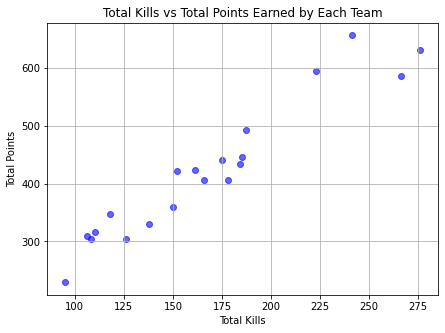

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(team_stats['Total Kills'], team_stats['Total Points'], color='blue', alpha=0.6)


plt.title('Total Kills vs Total Points Earned by Each Team')
plt.xlabel('Total Kills')
plt.ylabel('Total Points')
plt.grid(True)


plt.show()


In [31]:
#24 Identify outliers in team performance using the interquartile range (IQR) for total points.

total_points = data.groupby('Teams')['Total'].sum().reset_index()

Q1 = total_points['Total'].quantile(0.25)
Q3 = total_points['Total'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = total_points[(total_points['Total'] < lower_bound) | (total_points['Total'] > upper_bound)]

print("Outliers in Team Performance (Total Points):")
print(outliers)



Outliers in Team Performance (Total Points):
   Teams  Total
12    OR    657


In [33]:
#25 Analyze the match with the highest average kills per team.

average_kills_per_match = data.groupby('Match No')['Kills'].mean().reset_index()


highest_average_kills = average_kills_per_match.loc[average_kills_per_match['Kills'].idxmax()]


match_details = data[data['Match No'] == highest_average_kills['Match No']]


print(f"Match No: {highest_average_kills['Match No']}")

print(f"Highest Average Kills: {highest_average_kills['Kills']:.2f}")


print("\nTeams and their kills:")

print(match_details[['Teams', 'Kills']])


Match No: 27.0
Highest Average Kills: 3.05

Teams and their kills:
           Teams  Kills
520        Celtz      4
521         Crwl      0
522     Deadeyes      7
523           EX      2
524       Fnatic     10
525      GodLike      8
526         Hype      2
527          IND      1
528     Instinct      0
529    JyanMaara      0
530       Marcos      3
531    MegaStars      4
532           OR      7
533       PowerH      0
534          SGE      4
535         SouL      0
536      Tamilas      0
537   TSM Entity      6
538   Umumba Rxn      3
539       Xtreme      0


In [35]:
#26 Calculate the average number of kills per game for each team and identify significant deviations.

team_stats = data.groupby('Teams').agg({'Kills': 'sum','Match Played': 'count'}).reset_index()

team_stats= team_stats['Kills'] / team_stats['Match Played']

print(team_stats)

0     2.500000
1     2.683333
2     1.583333
3     1.966667
4     3.083333
5     3.716667
6     2.100000
7     2.766667
8     1.800000
9     1.766667
10    2.916667
11    3.116667
12    4.016667
13    2.533333
14    4.433333
15    3.066667
16    4.600000
17    2.300000
18    2.966667
19    1.833333
dtype: float64


In [36]:
#27 Find the player with the highest kills-to-damage ratio.

player_stats = data.groupby('Teams').agg({'Kills': 'sum','Total': 'sum'}).reset_index()

player_stats['Kills-to-Damage Ratio'] = player_stats['Kills'] / player_stats['Total']

best_player = player_stats.loc[player_stats['Kills-to-Damage Ratio'].idxmax()]

print("Player/Team with the Highest Kills-to-Damage Ratio:")
print(f"Team: {best_player['Teams']}")
print(f"Total Kills: {best_player['Kills']}")
print(f"Total Damage (Total): {best_player['Total']:.2f}")
print(f"Kills-to-Damage Ratio: {best_player['Kills-to-Damage Ratio']:.2f}")


Player/Team with the Highest Kills-to-Damage Ratio:
Team:  SGE
Total Kills: 266
Total Damage (Total): 586.00
Kills-to-Damage Ratio: 0.45


In [38]:
#28 How does the average damage per player vary across different matches?

average_damage_per_match = data.groupby('Match No')['Total'].mean().reset_index()

average_damage_per_match.columns = ['Match No', 'Average Damage']


print("Average Damage Per Player Across Different Matches:")

print(average_damage_per_match)




Average Damage Per Player Across Different Matches:
    Match No  Average Damage
0          1            6.70
1          2            7.05
2          3            7.20
3          4            6.95
4          5            7.20
5          6            6.90
6          7            6.80
7          8            7.05
8          9            7.00
9         10            7.00
10        11            7.00
11        12            6.85
12        13            7.10
13        14            7.00
14        15            7.05
15        16            7.05
16        17            7.20
17        18            6.95
18        19            7.15
19        20            7.05
20        21            7.05
21        22            6.90
22        23            7.10
23        24            7.05
24        25            6.90
25        26            6.90
26        27            7.30
27        28            7.10
28        29            7.05
29        30            7.15
30        31            7.20
31        32        

In [41]:
#29 Identify the player with the highest number of kills in a single match and compare their performance across other matches.

max_kills_match = data.loc[data['Kills'].idxmax()] 


player_max_kills = max_kills_match['Teams']

max_kills = max_kills_match['Kills']


player_performance = data[data['Teams'] == player_max_kills]


print(f"Player with the highest kills in a single match: {player_max_kills}")

print(f" Kills: {max_kills}")


print("\nPerformance of the player across all matches:")

print(player_performance[['Match No', 'Kills','Teams']].sort_values(by='Kills', ascending=False))


Player with the highest kills in a single match:  TSM Entity
 Kills: 19

Performance of the player across all matches:
      Match No  Kills        Teams
17           1     19   TSM Entity
737         37     19   TSM Entity
657         33     16   TSM Entity
257         13     13   TSM Entity
857         43     12   TSM Entity
77           4     11   TSM Entity
957         48     10   TSM Entity
777         39      9   TSM Entity
1157        58      9   TSM Entity
457         23      9   TSM Entity
757         38      9   TSM Entity
1117        56      8   TSM Entity
517         26      8   TSM Entity
717         36      8   TSM Entity
97           5      7   TSM Entity
837         42      7   TSM Entity
1097        55      7   TSM Entity
437         22      6   TSM Entity
797         40      6   TSM Entity
377         19      6   TSM Entity
1057        53      6   TSM Entity
817         41      6   TSM Entity
537         27      6   TSM Entity
497         25      5   TSM Entity
357   

In [43]:
#30 Find the match where the team with the lowest rank achieved the most kills.

lowest_ranked_team_per_match = data.loc[data.groupby('Match No')['Placement'].idxmax()]


most_kills_by_lowest_ranked = lowest_ranked_team_per_match.sort_values(by='Kills', ascending=False).iloc[0]


print(f"Match No: {most_kills_by_lowest_ranked['Match No']}")
print(f"Team: {most_kills_by_lowest_ranked['Teams']}")
print(f"Placement: {most_kills_by_lowest_ranked['Placement']}")
print(f"Kills: {most_kills_by_lowest_ranked['Kills']}")


Match No: 1
Team:  TSM Entity
Placement: 20
Kills: 19


In [42]:
#31 Calculate the total points contributed by each player on the top-ranked team.

team = data.groupby('Teams')['Placement'].mean().idxmin()

top_team = data[data['Teams'] == team]

total_points = top_team.groupby('Teams')['Total'].sum().reset_index()

print(f"Total Points Contributed by Each Player on the Top-Ranked Team ({team}):")

print(total_points)


Total Points Contributed by Each Player on the Top-Ranked Team ( Deadeyes):
       Teams  Total
0   Deadeyes    229
